<a href="https://colab.research.google.com/github/twishackaul/CIFAR-10-Classification/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
!pip install tensorflow==2.15.1

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, datasets, layers

In [43]:
import warnings
warnings.filterwarnings('ignore')

###Loading Dataset

In [44]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [45]:
X_train.shape

(50000, 32, 32, 3)

In [46]:
X_test.shape

(10000, 32, 32, 3)

50000 and 10000 training and testing input, 32*32 pixel size and 3 color channels (RGB)

In [47]:
y_train.shape

(50000, 1)

In [48]:
y_test.shape

(10000, 1)

In [49]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

labels are in 2 dimensions bcoz of the indeces present i.e. rows and columns

In [50]:
y_train.ndim

2

In [51]:
# converting 2d to 1d

y_train = y_train.flatten()
y_test = y_test.flatten()

In [52]:
y_train.shape

(50000,)

In [53]:
y_test.shape

(10000,)

In [54]:
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
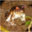

In [55]:
X_train[0]

###Data Exploration

In [56]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [57]:
def plot_image(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

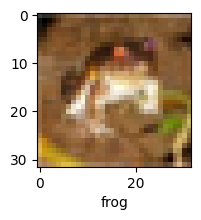

In [58]:
plot_image(X_train, y_train, 0)

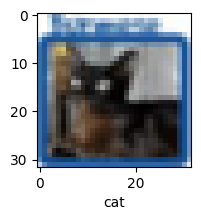

In [59]:
plot_image(X_train, y_train, 59)

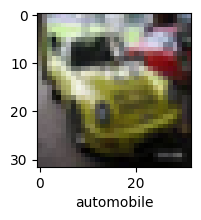

In [60]:
plot_image(X_train, y_train, 699)

###Performing normalization

In [61]:
X_train = X_train/255
X_test = X_test/255

In [62]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

###Building ANN model


In [63]:
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [64]:
ANN.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 263s 168ms/step - loss: 1.8117 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 203s 130ms/step - loss: 1.6241 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 198s 127ms/step - loss: 1.5422 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 197s 126ms/step - loss: 1.4833 - accuracy: 0.4755
Epoch 5/5
1563/1563 [==============================] - 198s 127ms/step - loss: 1.4347 - accuracy: 0.4951


Training accuracy = 49.51%

In [65]:
ANN.evaluate(X_test, y_test)

313/313 [==============================] - 14s 43ms/step - loss: 1.4932 - accuracy: 0.4728


[1.4932481050491333, 0.47279998660087585]

Testing accuracy = 47.28%

In [66]:
y_predA = ANN.predict(X_test)

313/313 [==============================] - 20s 64ms/step


In [67]:
y_predA[0:5]

array([[0.4717425 , 0.7388217 , 0.64303434, 0.90628713, 0.34509915,
        0.73897916, 0.6956774 , 0.05480141, 0.7373436 , 0.1171927 ],
       [0.8788896 , 0.99066406, 0.19615461, 0.1815726 , 0.106575  ,
        0.05509114, 0.02626488, 0.15298691, 0.98441523, 0.9879382 ],
       [0.9756512 , 0.9766902 , 0.2670041 , 0.15843114, 0.15136968,
        0.10352068, 0.0083153 , 0.28858978, 0.9853367 , 0.94273806],
       [0.89017797, 0.90476406, 0.42676285, 0.26617935, 0.3675405 ,
        0.17095533, 0.01433213, 0.7062687 , 0.9154808 , 0.5094211 ],
       [0.20482822, 0.28444925, 0.7176552 , 0.5700564 , 0.90908706,
        0.45528734, 0.8093264 , 0.36936423, 0.47311553, 0.08355614]],
      dtype=float32)

In [68]:
y_predA_new = [np.argmax(i) for i in y_predA]

In [69]:
y_predA_new[0:5]

[3, 1, 8, 8, 4]

In [70]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [71]:
CM = tf.math.confusion_matrix(labels = y_test, predictions = y_predA_new)
CM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[594,  97,  20,  14,   7,   1,  19,  54, 156,  38],
       [ 25, 789,   5,  14,   3,   0,  10,  25,  56,  73],
       [139,  91, 248, 122,  59,  20, 115, 145,  49,  12],
       [ 66, 122,  41, 366,  23,  53, 106, 100,  63,  60],
       [ 85,  68, 118,  70, 272,  14, 132, 183,  47,  11],
       [ 50,  90,  49, 253,  33, 170,  74, 177,  79,  25],
       [ 21,  83,  47,  98,  69,  15, 561,  56,  30,  20],
       [ 44,  66,  16,  64,  31,  13,  24, 654,  33,  55],
       [122, 130,   1,  16,   3,   2,   6,  19, 656,  45],
       [ 41, 391,   1,  18,   2,   2,  15,  41,  71, 418]], dtype=int32)>

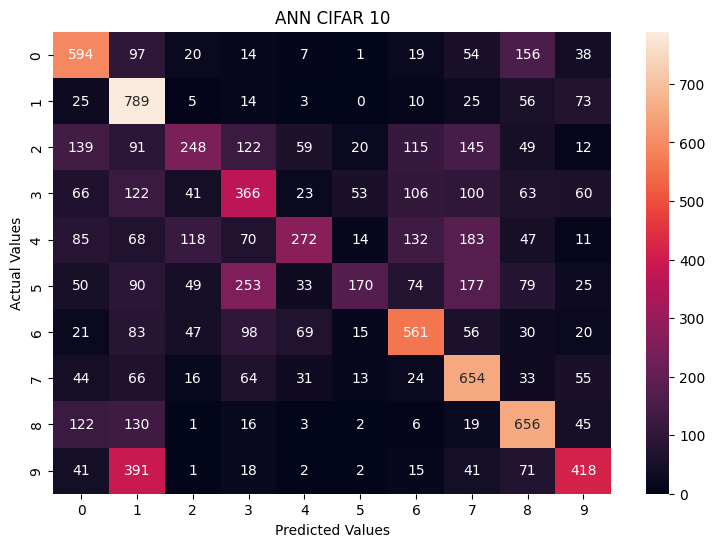

In [72]:
plt.figure(figsize = (9,6))
sns.heatmap(CM, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ANN CIFAR 10')
plt.show()

##Building CNN Model

In [73]:
CNN = models.Sequential([

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

In [74]:
CNN.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [75]:
CNN.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 76s 47ms/step - loss: 1.4519 - accuracy: 0.4804
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1135 - accuracy: 0.6114
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9831 - accuracy: 0.6577
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8969 - accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8284 - accuracy: 0.7124
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7710 - accuracy: 0.7341
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7209 - accuracy: 0.7486
Epoch 8/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.6756 - accuracy: 0.7638
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6319 - accuracy: 0.7798
Epoch 10/10
1563/1563 [==============================] - 83s 53m

###Training accuracy = 79.31%

In [76]:
CNN.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9612 - accuracy: 0.6830


[0.9612175822257996, 0.6830000281333923]

###Testing accuracy = 68.30%

In [40]:
y_pred = CNN.predict(X_test)

313/313 [==============================] - 7s 22ms/step


In [77]:
y_pred[0:5]

array([[5.42741582e-05, 2.77891202e-04, 1.27208035e-03, 9.65070009e-01,
        8.99678780e-05, 3.26523855e-02, 1.19214215e-04, 1.62348559e-04,
        1.59998715e-04, 1.41846220e-04],
       [3.42697778e-04, 3.39162759e-02, 9.03396483e-07, 1.32336012e-07,
        1.31289490e-09, 3.25760019e-09, 3.20705740e-10, 2.29740582e-08,
        9.65174139e-01, 5.65688650e-04],
       [4.48789746e-02, 2.04495057e-01, 6.76584546e-04, 1.39560283e-03,
        2.28897814e-04, 2.65402079e-04, 7.83570249e-06, 8.03331845e-04,
        7.27901101e-01, 1.93471946e-02],
       [8.85859609e-01, 4.24522981e-02, 4.34305072e-02, 4.88278194e-04,
        1.20838834e-02, 7.43019118e-05, 2.06280365e-05, 9.87374915e-06,
        1.08207259e-02, 4.75974381e-03],
       [1.36700305e-06, 2.14426236e-05, 3.63057941e-01, 4.97969566e-03,
        8.54139179e-02, 1.10999717e-04, 5.46407998e-01, 7.88369448e-07,
        5.62547893e-06, 1.60266424e-07]], dtype=float32)

In [78]:
y_pred_new = [np.argmax(i) for i in y_pred]

In [79]:
y_pred_new[0:5]

[3, 8, 8, 0, 6]

In [80]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [82]:
CM_CNN = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_new)
CM_CNN

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[713,  39,  60,  23,  18,   6,  14,  18,  63,  46],
       [  6, 862,  11,   9,   3,   2,   9,   3,  20,  75],
       [ 53,   7, 586,  72,  73,  40,  76,  66,  16,  11],
       [ 11,  21,  83, 538,  76,  84,  78,  59,  24,  26],
       [ 15,   6,  79,  68, 579,  12,  97, 130,   9,   5],
       [  9,  13,  67, 228,  58, 479,  35,  88,  11,  12],
       [  4,   9,  51,  63,  17,  17, 812,  11,   7,   9],
       [ 13,   5,  37,  41,  40,  26,  11, 801,   3,  23],
       [ 56,  55,  10,  17,  13,   6,   3,   9, 791,  40],
       [ 20, 112,   8,  16,   5,   3,   7,  22,  14, 793]], dtype=int32)>

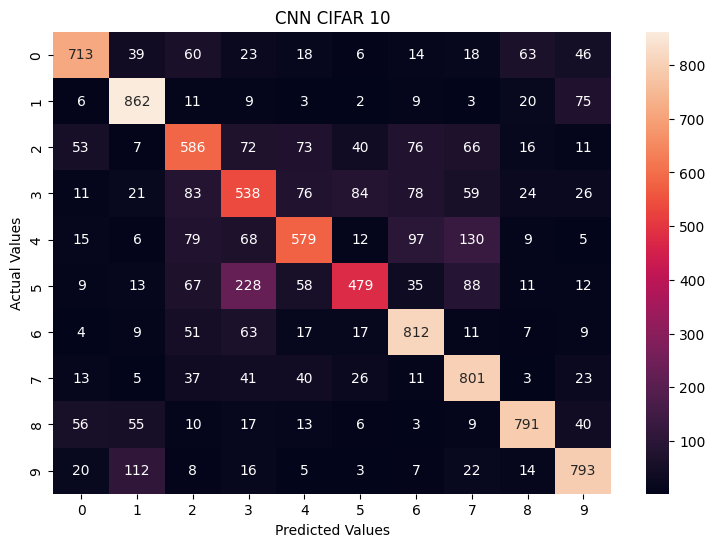

In [83]:
plt.figure(figsize = (9,6))
sns.heatmap(CM_CNN, annot = True, fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('CNN CIFAR 10')
plt.show()

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1000
           1       0.76      0.86      0.81      1000
           2       0.59      0.59      0.59      1000
           3       0.50      0.54      0.52      1000
           4       0.66      0.58      0.62      1000
           5       0.71      0.48      0.57      1000
           6       0.71      0.81      0.76      1000
           7       0.66      0.80      0.73      1000
           8       0.83      0.79      0.81      1000
           9       0.76      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



In [87]:
CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               